# CodSoft Data Science Internship

#### Dataset from --  https://www.kaggle.com/datasets/yasserh/titanic-dataset

# TASK:1 TITANIC SURVIVAL PREDICTION

In [210]:
import numpy as np
import pandas as pde
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

## Importing the dataset

In [2]:
TitanicData = pd.read_csv("Titanic-Dataset.csv")

In [9]:
TitanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preprocessing and Cleaning

In [10]:
TitanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Kovarthana\AppData\Local\Temp\ipykernel_8740\2024377539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(TitanicData.corr())


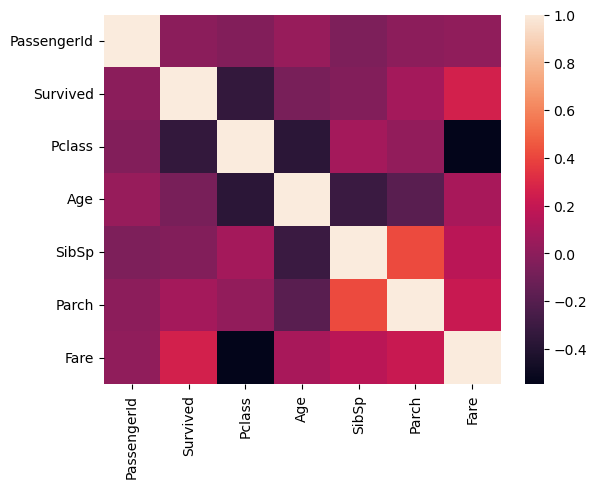

In [11]:
sns.heatmap(TitanicData.corr())
plt.show()

## Droping duplicates

In [23]:
TitanicData.duplicated().sum()

111

In [27]:
TitanicData.drop_duplicates(inplace=True)
TitanicData.duplicated().sum()

0

In [28]:
TitanicData.shape

(780, 8)

## Removing unwanted columns

In [30]:
#As we see in previous plot, there are non-numeric columns that doesn't really contribute well.so we are removing the unwanted non-nummeric columns  
TitanicData.drop(["PassengerId","Name","Cabin","Ticket"],inplace=True,axis=1)
TitanicData.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Removing the null values 

In [20]:
#replacing the null values in age to its mean value.

TitanicData['Age'].fillna(TitanicData['Age'].mean(), inplace=True)
TitanicData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
TitanicData["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [116]:
#Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [32]:
TitanicData["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
print(TitanicData['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [36]:
TitanicData['Embarked'].fillna(TitanicData['Embarked'].mode()[0], inplace=True)

In [37]:
TitanicData["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [43]:
TitanicData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# Exploratory data analysis

## We will understand the survival rates. 

In [47]:
survivedCounts=TitanicData['Survived'].value_counts()
survivedCounts

0    458
1    322
Name: Survived, dtype: int64

In [48]:
survivedRates = survivedCounts /len(TitanicData)*100
survivedRates

0    58.717949
1    41.282051
Name: Survived, dtype: float64

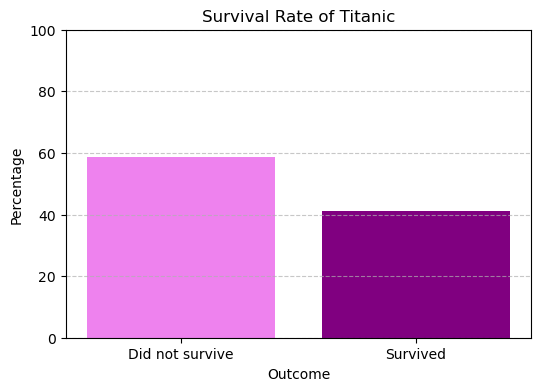

In [142]:
plt.figure(figsize=(6,4))
plt.bar(survivedRates.index,survivedRates.values,color=['violet','purple'])
plt.xticks(survivedRates.index,['Did not survive','Survived'])
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Survival Rate of Titanic')
plt.ylim(0,100)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

## Analysis on  Survived,Sex,Pclass,Embarked

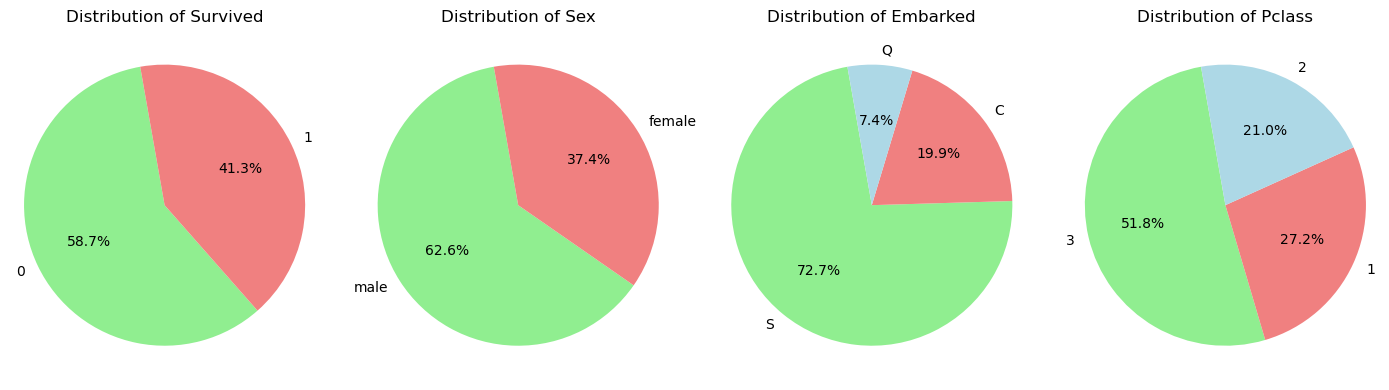

In [139]:
columns=['Survived','Sex','Embarked','Pclass']
plt.figure(figsize=(14,4))

for i,col in enumerate(columns):
    plt.subplot(1,4,i+1)
    x =TitanicData[col].value_counts().reset_index()
    labels=x['index'].astype(str) 
    sizes= x[col]

    plt.title(f"Distribution of {col}")
    plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=100,colors=['lightgreen','lightcoral','lightblue'])
    plt.axis('equal')
plt.tight_layout()
plt.show()

 From the above graph ,we can conclude that
 
~ Approx. 59% of passengers didn't survive


~ Titanic dataset shows a higher number of males than females, which can be attributed to the larger proportion of male crew members on board.


~ Approx. 73% of passengers departed from Southampton.


~ Approx. 52% of passengers are from pclass 3


### Distribution plot of age by survival status


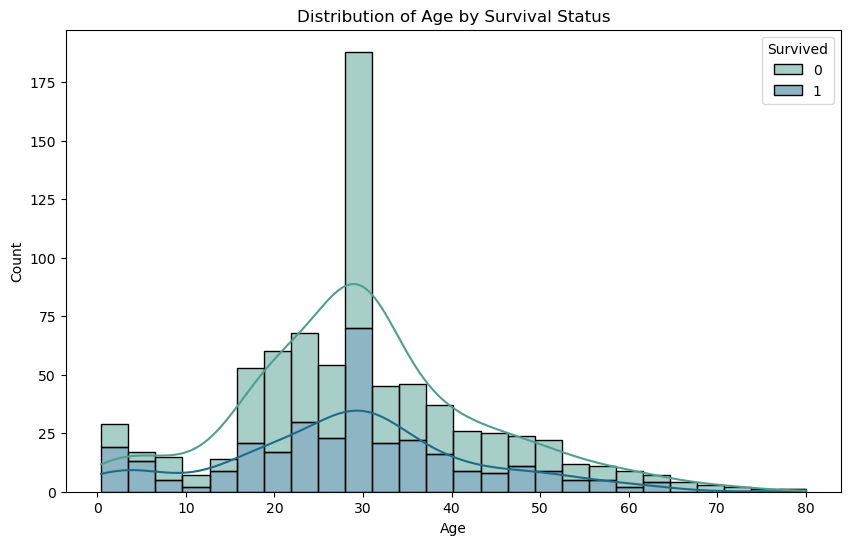

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(data=TitanicData, x='Age', hue='Survived', multiple='stack', kde=True,palette='crest')
plt.title('Distribution of Age by Survival Status')
plt.show()

##  Count plot of survivors and non-survivors by gender

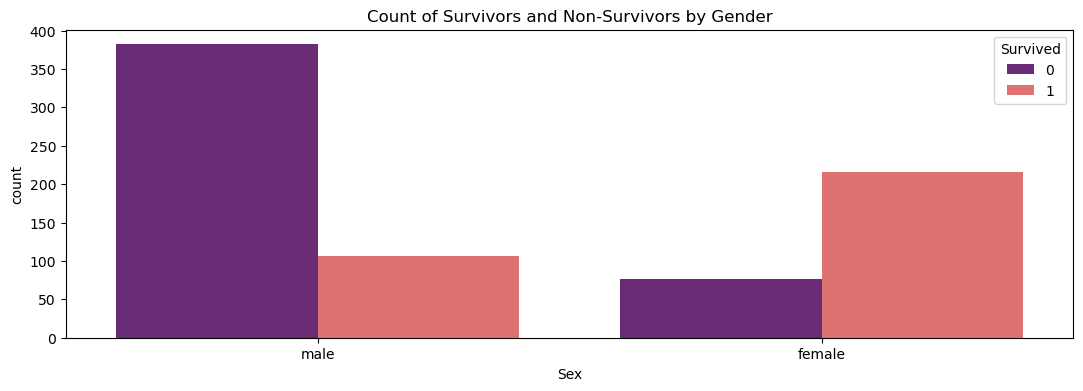

In [136]:
plt.figure(figsize=(13,4))
sns.countplot(data=TitanicData,x='Sex',hue='Survived',palette='magma')
plt.title('Count of Survivors and Non-Survivors by Gender')
plt.show()

From the above graph , we can conclude that 

there are more female survivors than the male survivors.

## Survival vs PClass 


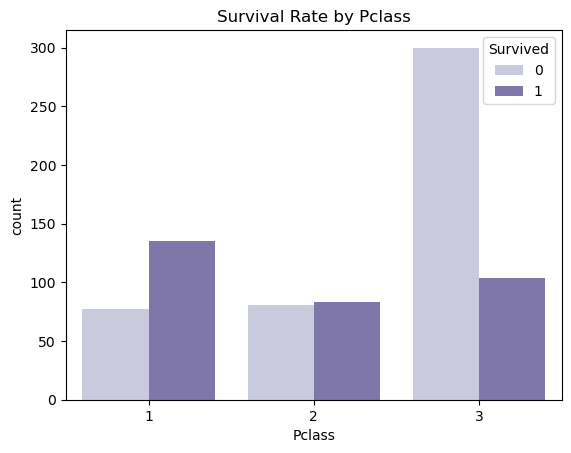

In [129]:
sns.countplot(x="Pclass", hue="Survived", data=TitanicData,palette='Purples')
plt.title("Survival Rate by Pclass")
plt.show()

So in Pclass 3 there is significant deaths than the Pclass 1 and Pclass 2

## Will find out if the fare of the Pclass contributes to deaths!

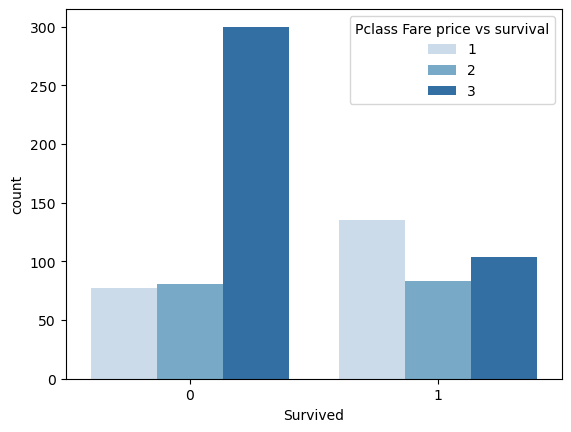

In [126]:
sns.countplot(data=TitanicData,x="Survived", hue="Pclass",palette='Blues')
plt.legend(title="Pclass Fare price vs survival", loc="upper right", bbox_to_anchor=(1, 1))
plt.show()


# Building the model

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [238]:
TitanicData.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
X = TitanicData.drop(columns = ['Survived'],axis=1)
Y = TitanicData['Survived']
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
885       3    1  39.000000      0      5  29.1250         2
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[780 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 780, dtype: int64


In [336]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1,random_state=2)
print(X.shape, X_train.shape,X_test.shape)

(780, 7) (702, 7) (78, 7)


In [337]:
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)

In [338]:
print(X_train_prediction)

[0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 

In [339]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 1]


In [340]:
accuracy = accuracy_score(Y_test, X_test_prediction)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 78.21%


## We will try increasing the accuracy

In [356]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
TitanicData['Age'] = imputer.fit_transform(TitanicData[['Age']])
TitanicData['Fare'] = imputer.fit_transform(TitanicData[['Fare']])

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = TitanicData[features]
y = TitanicData['Survived']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 83.33%


## Confusion Matrix

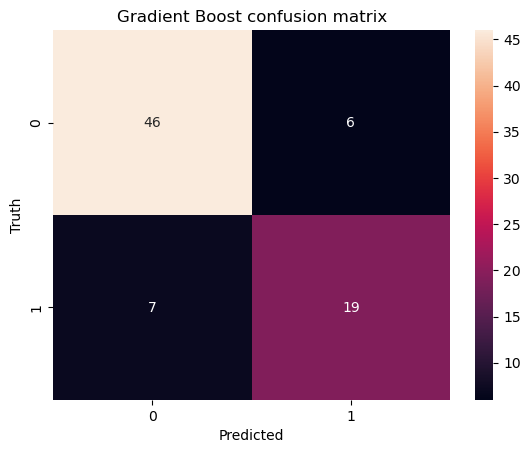

In [361]:
import scikitplot as skplt
cm = skplt.metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Gradient Boost confusion matrix")
plt.show()